In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

This project uses a dataset of over 80,000 UFO sightings over the past century.  We will examine, clean and analyze the data nd attempt to find conclusions or patterns.

In [441]:
ufos = pd.read_csv('scrubbed.csv')

C:\Users\ryan7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration

Now, we explore our dataset, taking note of any areas which may need cleaning.

In [442]:
ufos.info()
ufos.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


datetime                  city state country     shape  \
12076   9/23/1998 21:45               houston    tx      us  fireball   
80247    5/2/2014 20:40             san diego    ca      us  triangle   
36886   12/25/2005 4:28  horsham (uk/england)   NaN      gb   unknown   
11077   2/26/1998 20:30      colorado springs    co      us  fireball   
36234  10/31/2005 16:00           new milford    ct      us     cigar   

      duration (seconds) duration (hours/min)  \
12076                  3             2-3 sec.   
80247                  5            5 seconds   
36886                 30           30 seconds   
11077                 40            30-40 sec   
36234                120            2 minutes   

                                                comments date posted  \
12076                I saw a fireball fall from the sky.   9/26/1998   
80247  3 dim white lights in a triangle formation&#44...    5/8/2014   
36886                        objects on or near the moon   2/14/2006   
11077  A slowly descending Blue-Green Fireball.  Firs...   1/28/1999   
36234  rocket shape traveling south to north&#44 no n...   11/3/2005   

         latitude  longitude   
12076  29.7630556  -95.363056  
80247     32.7153 -117.156389  
36886       51.05   -0.333333  
11077  38.8338889 -104.820833  
36234  41.5769444  -73.408889

We have some missing values to deal with in the 'state', 'country' and 'shape' columns.  For simplicity, we will fill these with the string 'missing' so we can address them later.

In [443]:
ufos["state"] = ufos["state"].fillna("missing")
ufos["country"] = ufos["country"].fillna("missing")
ufos["shape"] = ufos["shape"].fillna("missing")

upper_states = []
for state in ufos["state"]:
    upper_states.append(state.upper())
ufos["state"] = upper_states

ufos["state"].unique()

array(['MISSING', 'MO', 'TX', 'IN', 'IL', 'OR', 'NY', 'CO', 'KS', 'ND',
       'PE', 'AK', 'CA', 'AL', 'SC', 'IA', 'MI', 'GA', 'TN', 'NE', 'LA',
       'KY', 'NM', 'BC', 'UT', 'RI', 'FL', 'NC', 'VA', 'WA', 'ME', 'AZ',
       'OH', 'PA', 'MN', 'WI', 'MD', 'NV', 'ID', 'OK', 'NB', 'WV', 'MS',
       'AR', 'NJ', 'CT', 'ON', 'MB', 'WY', 'AB', 'MA', 'MT', 'DC', 'PR',
       'DE', 'QC', 'NH', 'SD', 'NF', 'VT', 'HI', 'SA', 'NS', 'SK', 'PQ',
       'NT', 'YK', 'YT'], dtype=object)

# Analysis

### Sorting by State

For our first analysis, we want to see results by state, so we are only concerned with the rows which specify 'us' as the country.

Text(0, 0.5, 'State Abbr.')

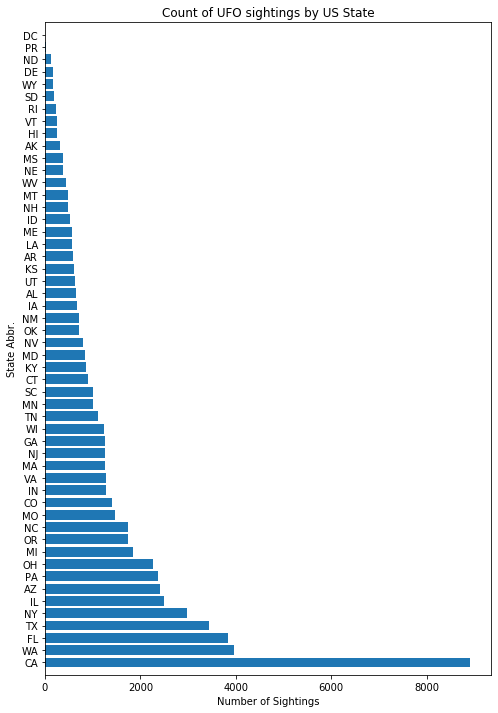

In [444]:
state_names = ufos[ufos["country"] == "us"].state.value_counts().index
state_counts = ufos[ufos["country"] == "us"].state.value_counts().values

fig, ax = plt.subplots(figsize = (8,12))
ax.barh(state_names, state_counts)
ax.set_ylim((-1,len(state_names)))
ax.set_title("Count of UFO sightings by US State")
ax.set_xlabel("Number of Sightings")
ax.set_ylabel("State Abbr.")

### Sorting by Year

Next let's look at results by year and time of year, to see if there are any seasonal or yearly trends among UFO sightings.

Now, we must extract the season from the date of each sighting.  To do this, we will make a new column for 'month' and also for 'season'.

In [445]:
#seasons key: 0=winter, 1=spring, 2=summer, 3=fall

years = []
seasons = []
months = []
for row in ufos["datetime"]:
    split_row = row.split('/')
    year = split_row[2].split(' ')[0]
    month = int(split_row[0])
    
    value = ""
    if month < 3:
        value = 0
    elif month < 6:
        value = 1
    elif month < 9:
        value = 2
    elif month < 12:
        value = 3
    elif month < 13:
        value = 0

    years.append(year)
    months.append(month)
    seasons.append(value)

ufos["year"] = years
ufos["month"] = months
ufos["season"] = seasons

First, we analyze yearly trends, to see if UFO sightings have been recorded more or less frequently in recent years.  We see that, in fact, UFO sightings recorded in this dataset significantly increased around the mid/late 1990s, with a peak in the 2010s. We must of course consider that the data might be biased, and older results may be harder to record or less likely to be found in this dataset for various reasons.

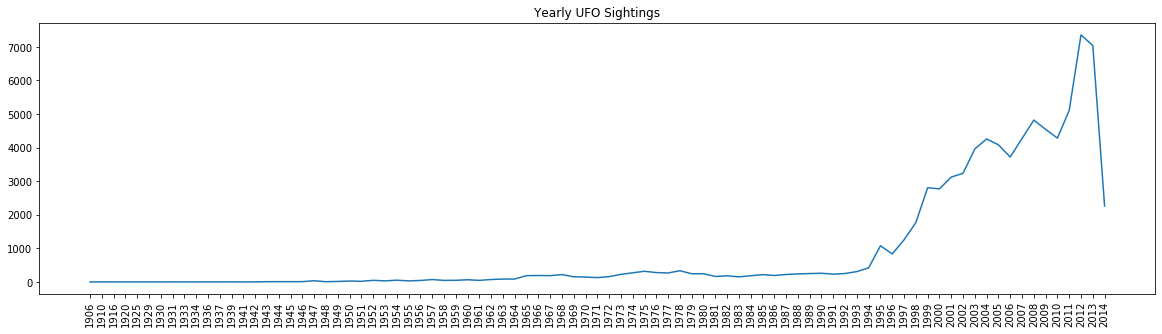

In [446]:
year_index = ufos["year"].value_counts().sort_index().index
year_counts = ufos["year"].value_counts().sort_index().values
year_tick_positions = np.arange(len(year_index))

fig, ax = plt.subplots(figsize =(20,5))

ax.plot(year_index, year_counts)
ax.set_title("Yearly UFO Sightings")
ax.tick_params(axis='x',rotation=90)

### Sorting by Month and Season

Next, we look at monthly and seasonal data, to see if there is any correlation as to when in the year UFO sightings are recorded.

[Text(0, 0, 'winter'),
 Text(0, 0, 'spring'),
 Text(0, 0, 'summer'),
 Text(0, 0, 'fall')]

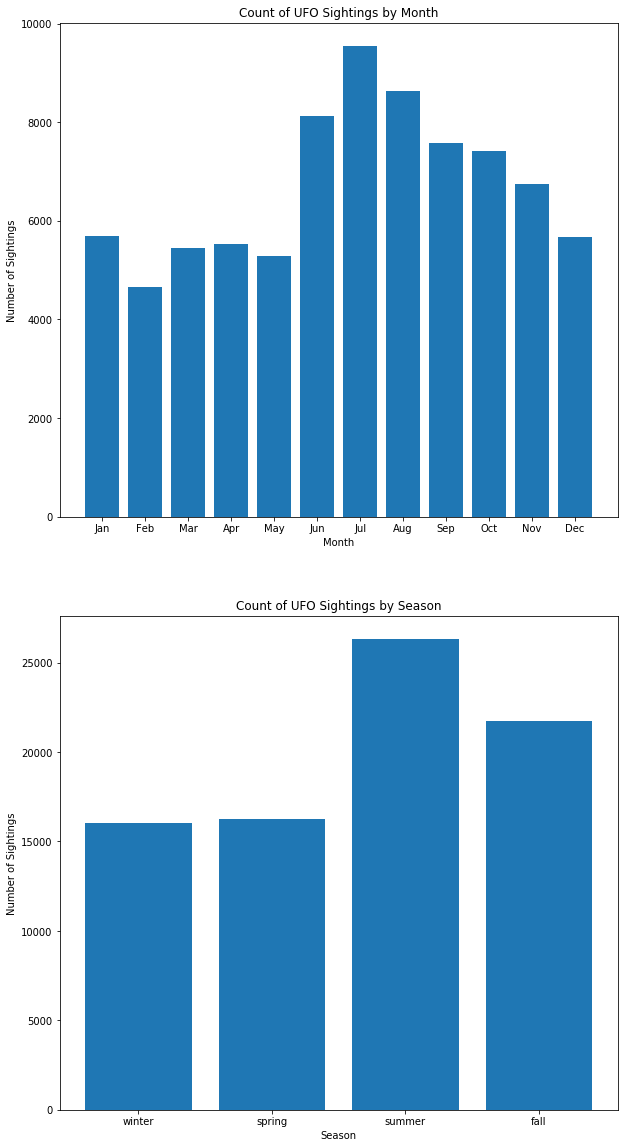

In [447]:
month_index = ufos["month"].value_counts().index
month_counts = ufos["month"].value_counts().values
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_tick_positions = np.arange(12) + 1

season_index = ufos["season"].value_counts().index
season_counts = ufos["season"].value_counts().values
season_names =['winter','spring','summer','fall']
season_tick_positions = np.arange(4)

fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(month_index, month_counts)
ax1.set_title("Count of UFO Sightings by Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Sightings")
ax1.set_xticks(month_tick_positions)
ax1.set_xticklabels(month_names)

ax2.bar(season_index, season_counts)
ax2.set_title("Count of UFO Sightings by Season")
ax2.set_xlabel("Season")
ax2.set_ylabel("Number of Sightings")
ax2.set_xticks(season_tick_positions)
ax2.set_xticklabels(season_names)

### Sorting by Time of Day

Finally, we can also sort by time of day that the sighting was recorded.

In [448]:
hours = []
for row in ufos["datetime"]:
    split_row = row.split(" ")
    time = split_row[1].split(":")
    hour = time[0]
    if hour=='24':
        hour='00'
    
    hours.append(hour)

ufos["hour"] = hours

First we need to make labels for hour names.

In [449]:
# make a list of hour names, using am and pm
hour_names = []
hour_suffix = "am"
x = 0
while x < 12:
    x += 1
    name = str(x) + hour_suffix
    
    if x == 12 and hour_suffix == "am":
        x = 0
        hour_suffix = "pm"
        
    hour_names.append(name)
    
# using the above list, create a list of 1-hour ranges
hour_ranges = []

#the first range 12pm-1am
hour_ranges.append(hour_names[len(hour_names)-1] + "-" + hour_names[0])

x = 0
while x < len(hour_names)-1:
    first = hour_names[x]
    second = hour_names[x + 1]
    x+= 1
    
    _range = first + "-" + second
    hour_ranges.append(_range)
    
print(hour_ranges)

['12pm-1am', '1am-2am', '2am-3am', '3am-4am', '4am-5am', '5am-6am', '6am-7am', '7am-8am', '8am-9am', '9am-10am', '10am-11am', '11am-12am', '12am-1pm', '1pm-2pm', '2pm-3pm', '3pm-4pm', '4pm-5pm', '5pm-6pm', '6pm-7pm', '7pm-8pm', '8pm-9pm', '9pm-10pm', '10pm-11pm', '11pm-12pm']


Text(0.5, 0, 'Time of Day')

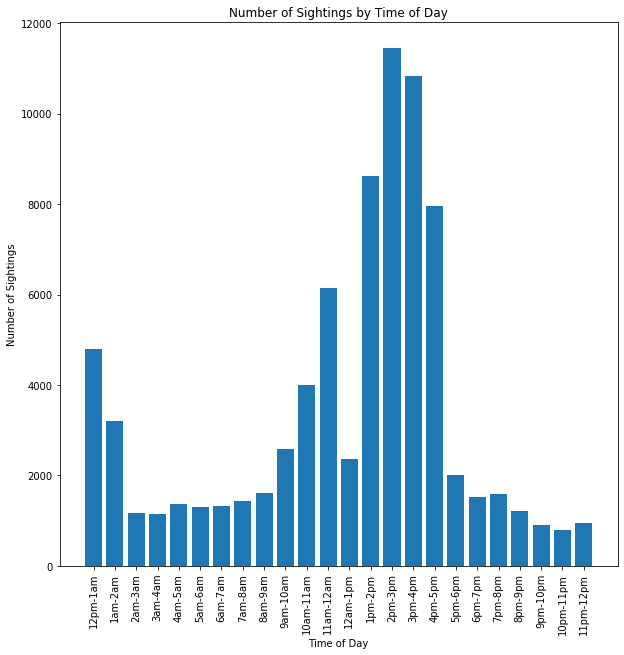

In [450]:
hour_index = ufos["hour"].value_counts().sort_index().index
hour_counts = ufos["hour"].value_counts().sort_index().values
hour_tick_positions = np.arange(24) + 1

fig, ax = plt.subplots(figsize = (10,10))

ax.bar(hour_index, hour_counts)
ax.set_xticklabels(hour_ranges, rotation=90)
ax.set_title("Number of Sightings by Time of Day")
ax.set_ylabel("Number of Sightings")
ax.set_xlabel("Time of Day")

### Sorting by Descriptors

Now we analyze the descriptions given of each UFO, by graphing the frequencies of the shape and number of seconds observed.  First we need to fix some erroneous values in the duration column so we can cast it to a numerical value.

In [451]:
ufos["duration (seconds)"] = ufos["duration (seconds)"].str.replace('`','')
ufos["duration (seconds)"] = ufos["duration (seconds)"].astype(float)
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 15 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   80332 non-null object
country                 80332 non-null object
shape                   80332 non-null object
duration (seconds)      65536 non-null float64
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
year                    80332 non-null object
month                   80332 non-null int64
season                  80332 non-null int64
hour                    80332 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 9.2+ MB


Now we look at the shape column.  First we notice that there are a some values which have very few observations.  We will get rid of these infrequent values by lumping them them with the value which most closely matches them.

In [452]:
print(ufos["shape"].value_counts())

ufos.loc[ufos["shape"] == 'delta','shape'] = 'triangle'
ufos.loc[ufos["shape"] == 'crescent','shape'] = 'other'
ufos.loc[ufos["shape"] == 'round','shape'] = 'circle'
ufos.loc[ufos["shape"] == 'changed','shape'] = 'other'
ufos.loc[ufos["shape"] == 'flare','shape'] = 'other'
ufos.loc[ufos["shape"] == 'hexagon','shape'] = 'other'
ufos.loc[ufos["shape"] == 'dome','shape'] = 'other'
ufos.loc[ufos["shape"] == 'pyramid','shape'] = 'triangle'

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
missing       1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
changed          1
flare            1
hexagon          1
dome             1
pyramid          1
Name: shape, dtype: int64


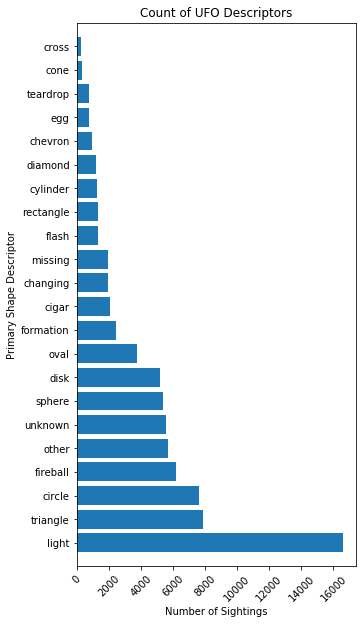

In [453]:
fig, ax = plt.subplots(figsize=(5,10))

shape_index = ufos["shape"].value_counts().index
shape_counts = ufos["shape"].value_counts().values

ax.barh(shape_index, shape_counts)
ax.set_ylim((-1,len(shape_index)))
ax.set_title("Count of UFO Descriptors")
ax.set_ylabel("Primary Shape Descriptor")
ax.set_xlabel("Number of Sightings")
ax.tick_params(axis='x',rotation=45)